### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

### Loading dataset

In [2]:
data = pd.read_csv('salarydata.csv')

### Dataset Analysis

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(32561, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Checking missing values and unique
def Checking_Null_Unique_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    max_count_item = []
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        max_count_item.append(statistics.mode(data[col]))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,\
                               "Max_Count_Item":max_count_item,\
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data

In [9]:
Checking_Null_Unique_Values(data)

,Variable,Total_Value,Total_Missing_Value,Max_Count_Item,Data_Type,Unique_Value,Total_Unique_Value
0,age,32561,0,36,int64,"[39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 2...",73
1,workclass,32561,0,Private,object,"[State-gov, Self-emp-not-inc, Private, Federal...",9
2,education,32561,0,HS-grad,object,"[Bachelors, HS-grad, 11th, Masters, 9th, Some-...",16
3,education-num,32561,0,9,int64,"[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...",16
4,marital-status,32561,0,Married-civ-spouse,object,"[Never-married, Married-civ-spouse, Divorced, ...",7
5,occupation,32561,0,Prof-specialty,object,"[Adm-clerical, Exec-managerial, Handlers-clean...",15
6,relationship,32561,0,Husband,object,"[Not-in-family, Husband, Wife, Own-child, Unma...",6
7,race,32561,0,White,object,"[White, Black, Asian-Pac-Islander, Amer-Indian...",5
8,sex,32561,0,Male,object,"[Male, Female]",2
9,capital-gain,32561,0,0,int64,"[2174, 0, 14084, 5178, 5013, 2407, 14344, 1502...",119


In [10]:
for i in ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']:
    print(i,':',data[i].unique(),'=> ',data[i].nunique())

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] =>  9
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] =>  16
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] =>  7
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] =>  15
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] =>  6
race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] =>  5
sex : ['Male' 'Female'] =>  2
native-country : ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'M

##### workclass,occupation,native-country has value with'?'
##### 1. We can either fill the fields with mode opreation  or <br> 2. We can consider it as Unknown category

### Visualization

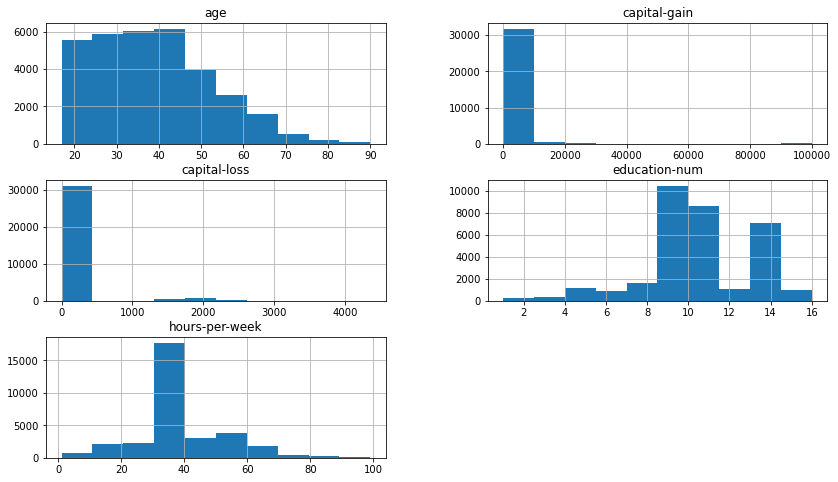

In [11]:
freqgraph = data.select_dtypes(include=['integer'])
freqgraph.hist(figsize=(14,8))
plt.show()

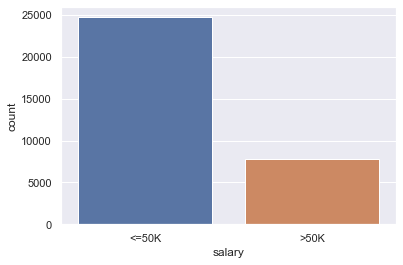

In [12]:
#Salary distribution
sns.set(style="darkgrid")
sns.countplot(data["salary"])

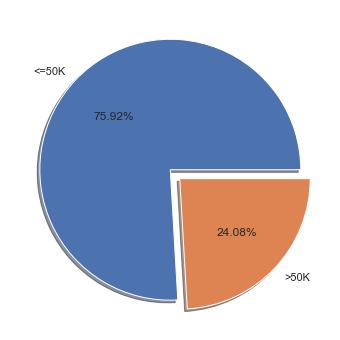

In [13]:
sizes = (data["salary"].value_counts()).tolist()
plt.figure(figsize = (8,6))
plt.pie(sizes,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['<=50K','>50K'])
plt.show()

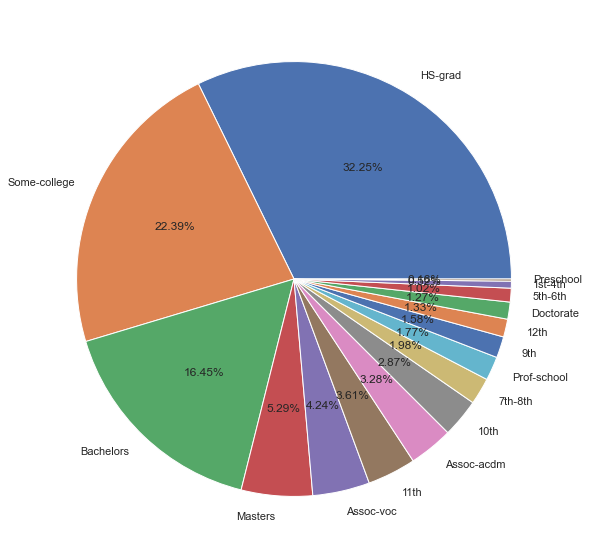

In [14]:
#-----education based----
sizes_edu = data['education'].value_counts()
plt.figure(figsize = (18,10))
plt.pie(sizes_edu.tolist(),labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()

In [15]:
#feature engineering
data['marital-status'].replace(['Separated'], 'Separated',inplace=True)
data['marital-status'].replace(['Divorced'], 'Separated',inplace=True)

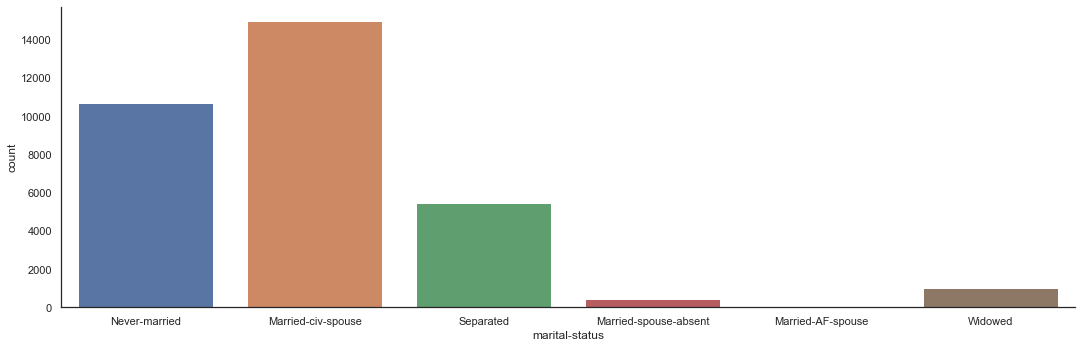

In [16]:
sns.set(style="white")
graph=sns.catplot(x="marital-status",kind="count",data=data,height=5,aspect=3)

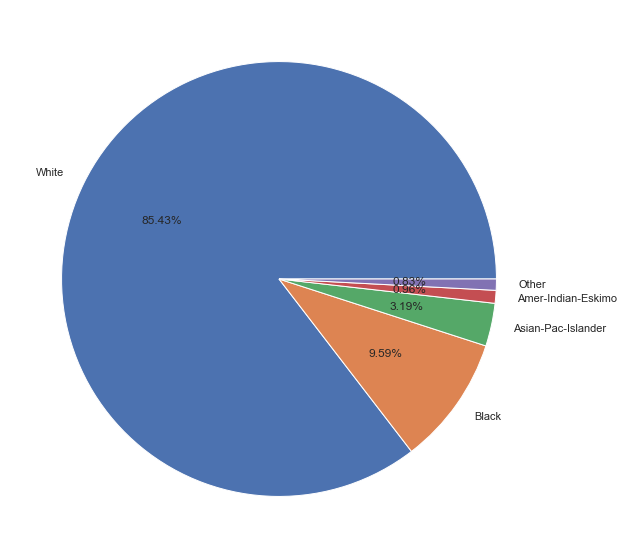

In [17]:
sizes_edu = data['race'].value_counts()
plt.figure(figsize = (18,10))
plt.pie(sizes_edu.tolist(),labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()

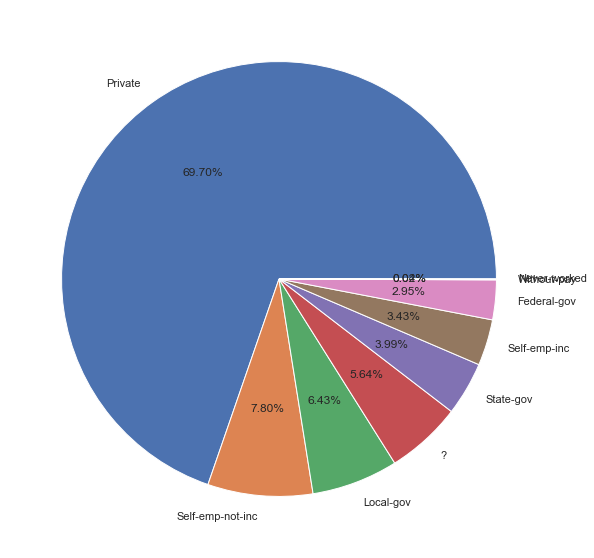

In [18]:
sizes_edu = data['workclass'].value_counts()
plt.figure(figsize = (18,10))
plt.pie(sizes_edu.tolist(),labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()

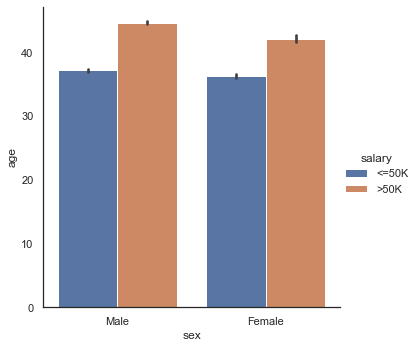

In [19]:
sns.catplot(data=data, kind="bar",x="sex", y="age", hue="salary")

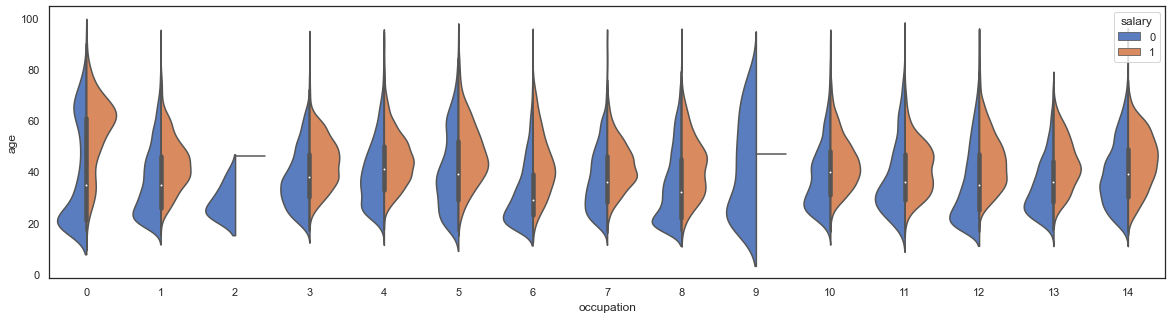

In [49]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(x="occupation", y="age", hue="salary",
                    data=data, gridsize=100, palette="muted", split=True, saturation=0.75)

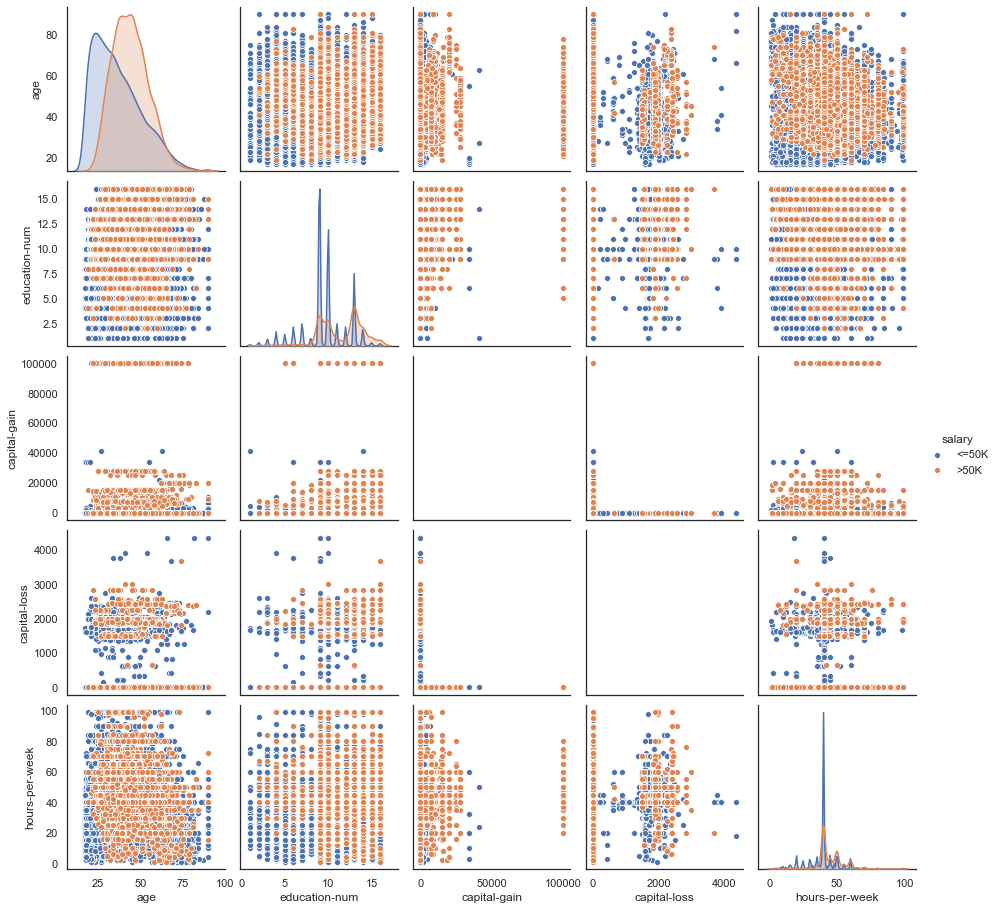

In [21]:
sns.pairplot(data=data, hue='salary') 
plt.show()

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in ['workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex','native-country', 'salary']:
    data[i] = label_encoder.fit_transform(data[i])

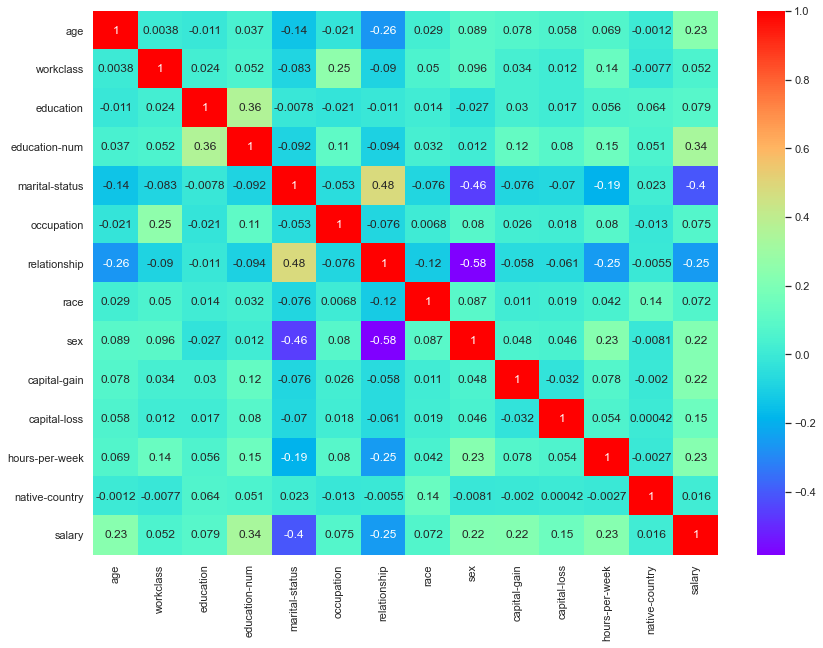

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap='rainbow')

In [25]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,9,12,3,1,1,4,1,2174,0,40,39,0
1,50,6,9,12,1,4,0,4,1,0,0,13,39,0
2,38,4,11,8,4,6,1,4,1,0,0,40,39,0
3,53,4,1,6,1,6,0,2,1,0,0,40,39,0
4,28,4,9,12,1,10,5,2,0,0,0,40,5,0


In [26]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,4,7,11,1,13,5,4,0,0,0,38,39,0
32557,40,4,11,8,1,7,0,4,1,0,0,40,39,1
32558,58,4,11,8,5,1,4,4,0,0,0,40,39,0
32559,22,4,11,8,3,1,3,4,1,0,0,20,39,0
32560,52,5,11,8,1,4,5,4,0,15024,0,40,39,1


In [27]:
for i in ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']:
    print(i,':',data[i].unique(),'=> ',data[i].nunique())

workclass : [7 6 4 1 2 0 5 8 3] =>  9
education : [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2] =>  16
marital-status : [3 1 4 2 0 5] =>  6
occupation : [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9] =>  15
relationship : [1 0 5 3 4 2] =>  6
race : [4 2 1 0 3] =>  5
sex : [1 0] =>  2
native-country : [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15] =>  42
salary : [0 1] =>  2


#

## Model Building

In [28]:
X=data.drop(['salary'],axis=1)
y=pd.DataFrame(data['salary'])

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

#### 1. Logistic Regression

In [30]:
logist_model = LogisticRegression()
logist_model.fit(X_train,y_train)
y_pred = logist_model.predict(X_test)


print('Accuracy is:',accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 82.92645478274221
Precision is: 68.55295068714632
Recall is: 53.97835773392744
f1 score is: 60.3988603988604


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4942
           1       0.69      0.54      0.60      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



[[4553  389]
 [ 723  848]]


#### 2. Decision Tree



In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train) 
y_pred = dt_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 82.3430062951021
Precision is: 63.53697749196141
Recall is: 62.889879057924894
f1 score is: 63.21177223288548


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4942
           1       0.64      0.63      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



[[4375  567]
 [ 583  988]]


#### 3. KNN

In [32]:
acc_values = []
neighbors = np.arange(2,16)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric ='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

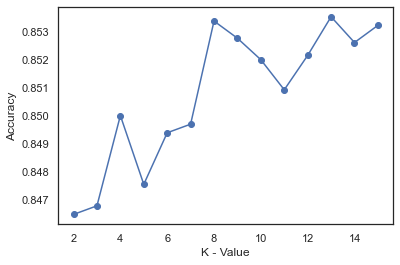

In [33]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K - Value')
plt.ylabel('Accuracy')

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 16, metric ='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 85.18347919545525
Precision is: 75.76530612244898
Recall is: 56.71546785486951
f1 score is: 64.87076811066619


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4942
           1       0.76      0.57      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.84      0.85      0.84      6513



[[4657  285]
 [ 680  891]]


#### 4. Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators = 50)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 85.19883310302473
Precision is: 72.1048798252003
Recall is: 63.01718650541057
f1 score is: 67.25543478260869


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



[[4559  383]
 [ 581  990]]


#### 5. Gradient Boosting

In [36]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 87.05665591893137
Precision is: 79.73856209150327
Recall is: 62.12603437301082
f1 score is: 69.83899821109124


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.86      6513



[[4694  248]
 [ 595  976]]


In [37]:
gb=GradientBoostingClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=1, subsample=1,random_state=42)
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)

print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 87.99324428066943
Precision is: 79.33085501858737
Recall is: 67.91852323360916
f1 score is: 73.18244170096023


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513



[[4664  278]
 [ 504 1067]]


### Scaling Dataset

#### 1. Standard Scaling

In [38]:
data2 = data
X_ss=data.drop(['salary'],axis=1)
y_ss=pd.DataFrame(data['salary'])

In [39]:
sc = StandardScaler()
X_ss = sc.fit_transform(X_ss)
X_ss = pd.DataFrame(X_ss)
X_train, X_test, y_train, y_test = train_test_split(X_ss,y_ss,random_state=42, test_size=0.2)

In [40]:
# 1. Linear
logist_model = LogisticRegression()
logist_model.fit(X_train,y_train)
y_pred = logist_model.predict(X_test)

#print(classification_report(y_test,y_pred))
print('Accuracy is:',accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy is: 83.92445877475816
Precision is: 71.83333333333334
Recall is: 54.869509866327185
f1 score is: 62.21580656802599


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4942
           1       0.72      0.55      0.62      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



[[4604  338]
 [ 709  862]]


In [41]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train) 
y_pred = dt_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 82.41977583294948
Precision is: 63.58418367346938
Recall is: 63.46276257161044
f1 score is: 63.52341510035042


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4942
           1       0.64      0.63      0.64      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



[[4371  571]
 [ 574  997]]


In [42]:
#3. RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 50)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)
print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 85.49055734684478
Precision is: 72.32524964336662
Recall is: 64.5448758752387
f1 score is: 68.21392532795156


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4942
           1       0.72      0.65      0.68      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



[[4554  388]
 [ 557 1014]]


In [43]:
#4. GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)

print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 87.05665591893137
Precision is: 79.73856209150327
Recall is: 62.12603437301082
f1 score is: 69.83899821109124


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.86      6513



[[4694  248]
 [ 595  976]]


## No variation in model preformance after Standard Scaling

## Hypertuning the best model

In [44]:
gb=GradientBoostingClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=1, subsample=1,random_state=42)
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred)*100)
print('Precision is:',precision_score(y_test,y_pred)*100)
print('Recall is:',recall_score(y_test,y_pred)*100)
print('f1 score is:',f1_score(y_test,y_pred)*100)

print("\n")
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 87.99324428066943
Precision is: 79.33085501858737
Recall is: 67.91852323360916
f1 score is: 73.18244170096023


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513



[[4664  278]
 [ 504 1067]]


## MODEL COMPARISON

In [45]:
data_result = {'Model_Name':['Logistic Regression','Decision Tree','KNN Classifier','Random Forest','GradientBoosting','GradientBoosting(Hypertuning)'],'Accuracy':[83.92,82.15,85.18,85.06,87.05,87.99],'Recall':[54.86,62.50,56.71,64.65,62.12,67.91],'Precision':[71.83,63.15,75.76,71.32,79.73,79.33],'F1 Score':[62.21,62.82,64.87,67.27,69.83,73.18]}
df_model = pd.DataFrame(data_result)

In [46]:
df_model

,Model_Name,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,83.92,54.86,71.83,62.21
1,Decision Tree,82.15,62.50,63.15,62.82
2,KNN Classifier,85.18,56.71,75.76,64.87
3,Random Forest,85.06,64.65,71.32,67.27
4,GradientBoosting,87.05,62.12,79.73,69.83
5,GradientBoosting(Hypertuning),87.99,67.91,79.33,73.18


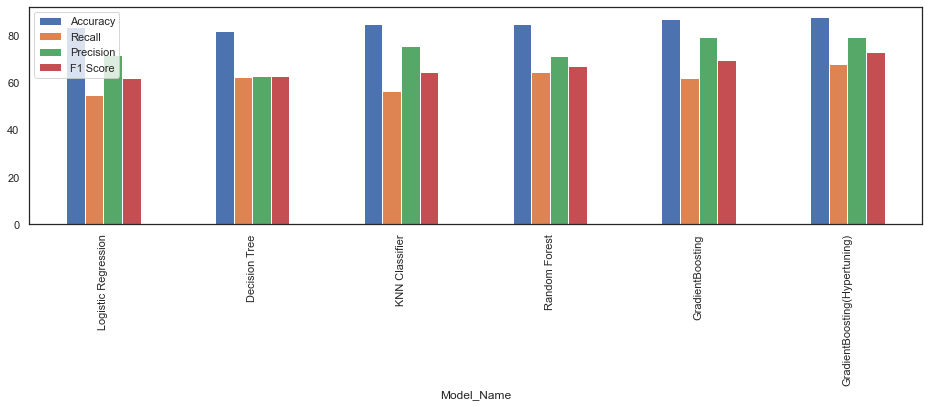

In [47]:
df_model.plot(x = "Model_Name",y=["Accuracy","Recall","Precision","F1 Score"],kind="bar",figsize=(16,4))

## Test Prediction